In [1]:
from sklearn.datasets import load_breast_cancer
bc = load_breast_cancer()

In [2]:
import pandas as pd
bc_df = pd.DataFrame(bc.data, columns=bc.feature_names)
bc_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(bc_df, bc.target, test_size = 0.2, random_state = 31)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(455, 30)
(455,)
(114, 30)
(114,)


In [4]:
from aix360.algorithms.rbm import FeatureBinarizer
fb = FeatureBinarizer(negations=True)
X_train_fb = fb.fit_transform(X_train)
X_test_fb = fb.transform(X_test)
X_train_fb['mean radius'][:8]

operation     <=                                                          \
value     10.254 11.328 11.942 12.604 13.270 14.142 15.058 17.026 19.324   
468            0      0      0      0      0      0      0      0      1   
179            0      0      0      0      1      1      1      1      1   
114            1      1      1      1      1      1      1      1      1   
35             0      0      0      0      0      0      0      1      1   
88             0      0      0      1      1      1      1      1      1   
507            0      1      1      1      1      1      1      1      1   
213            0      0      0      0      0      0      0      0      1   
134            0      0      0      0      0      0      0      0      1   

operation      >                                                          
value     10.254 11.328 11.942 12.604 13.270 14.142 15.058 17.026 19.324  
468            1      1      1      1      1      1      1      1      0  
179            1      1      1      1      0      0      0      0      0  
114            0      0      0      0      0      0      0      0      0  
35             1      1      1      1      1      1      1      0      0  
88             1      1      1      0      0      0      0      0      0  
507            1      0      0      0      0      0      0      0      0  
213            1      1      1      1      1      1      1      1      0  
134            1      1      1      1      1      1      1      1      0

In [5]:
from aix360.algorithms.rbm import GLRMExplainer, LogisticRuleRegression

In [6]:
logistic_model = LogisticRuleRegression(maxSolverIter=2000)
explainer = GLRMExplainer(logistic_model)
explainer.fit(X_train_fb, Y_train)

In [7]:
Y_pred = explainer.predict(X_test_fb)

In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print(f'Accuracy = {accuracy_score(Y_test, Y_pred)}')
print(f'Precision = {precision_score(Y_test, Y_pred, average="macro")}')
print(f'Recall = {recall_score(Y_test, Y_pred, average="macro")}')
print(f'F1 = {f1_score(Y_test, Y_pred, average="macro")}')

Accuracy = 0.9122807017543859
Precision = 0.9271794871794872
Recall = 0.8967926325817719
F1 = 0.9066491975106452


In [9]:
explainer.explain()

,rule,coefficient
0,(intercept),-11.1496
1,worst perimeter <= 116.46 AND worst concave po...,-11.9584
2,worst concave points <= 0.15,10.1245
3,worst perimeter <= 116.46 AND worst concave po...,9.8396
4,worst area <= 930.88,5.40176
5,worst area > 680.60 AND worst concavity > 0.22,-3.33913
6,worst perimeter <= 116.46 AND worst smoothness...,3.13943
7,mean concave points <= 0.05,1.51205
8,worst concavity <= 0.27,0.925846
9,worst concave points <= 0.12,0.633953


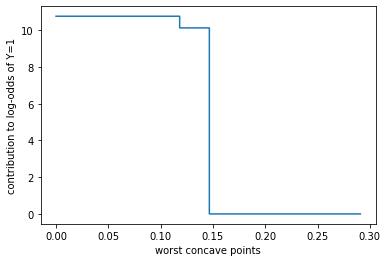

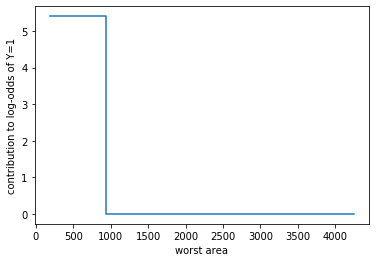

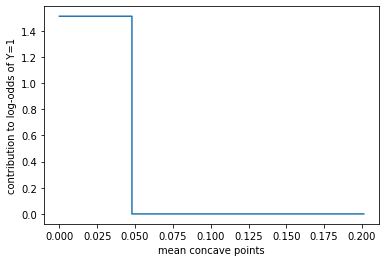

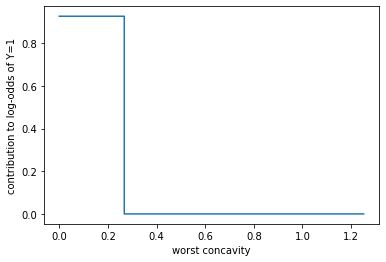

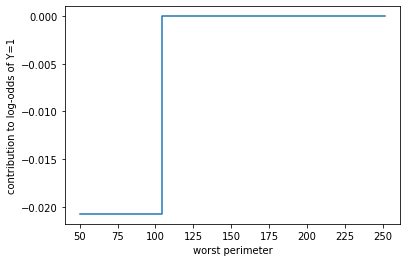

In [10]:
%matplotlib inline

fb = FeatureBinarizer(negations=True)
figs, _ = explainer.visualize(bc_df, fb)